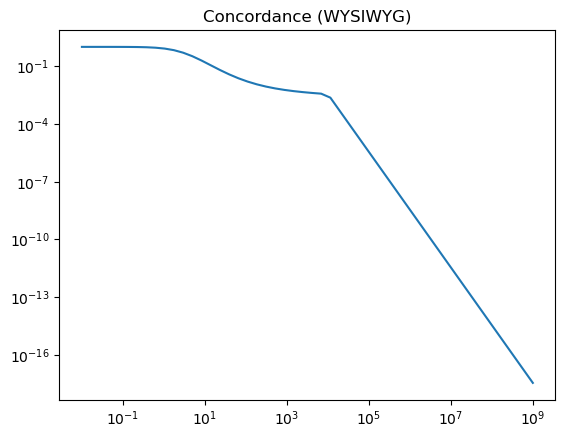

In [4]:
#CONCORDANCE COSMOLOGY (WYSIWYG)
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Cosmological parameters
omega_m = 0.315
omega_lambda = 0.685
omega_r = 5e-5

#Function for the expansion rate
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_lambda + omega_r * (1 + z)**4) #all 3 components

#Calculate time dilation integral
def time_dilation_integral(z):
    #Comoving and light-travel distance integrands
    def integrand(z_prime):
        D_C, _ = quad(lambda x: 1 / E(x), 0, z_prime)
        D_LT, _ = quad(lambda x: 1 / ((1+x) * E(x)), 0, z)
        
        return -3/2 * E(z_prime) * D_C**2 / ((1+z_prime)**3 * D_LT)
    
    #Compute integral from 0 to z
    result = quad(integrand, 0, z)[0]
    return result

#Evaluate and plot the time dilation for a range of redshifts
zs = np.logspace(-2, 9)

time_dilation_values_wys = []
Outer = 10**4

#Outer shell for high-redshift approximation
for z in zs:
    if z <= Outer:
        time_dilation_values_wys.append(time_dilation_integral(z))
    else:
        Outer_shell = -3*(2*np.log(2+z) - np.log(1+z) - 2*np.log(2+Outer) + np.log(1+Outer))
        time_dilation_values_wys.append(time_dilation_integral(Outer) + Outer_shell) 
        
time_dilation_values_wys = np.array(time_dilation_values_wys)

plt.plot(zs, np.exp(time_dilation_values_wys))
plt.xscale('log')
plt.yscale('log')
plt.title('Concordance (WYSIWYG)')
plt.show()

C:\Users\cspah\AppData\Local\Temp\ipykernel_5412\736450013.py:16: RuntimeWarning: invalid value encountered in sqrt
  Total_dilation = np.exp(-3*H_0**2 / (4*c**2) * r**2) * np.sqrt(1 - Lambda*(r**2)/3)


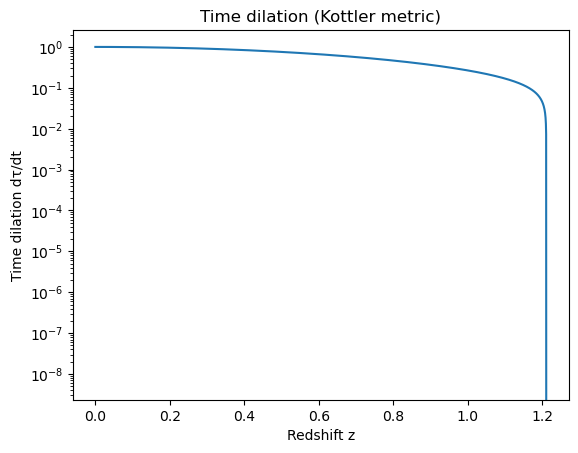

In [14]:
#KOTTLER METRIC CALC

#Cosmo constant
Lambda = 1.1e-52 #m^-2. Cosmological constant value
H_0 = 2.2e-18 #s^-1. Current Hubble parameter value. 
c = 3e8 #m * s-1. Speed of light. 
num_shells = 10000
dr = np.sqrt(3/Lambda) / num_shells
# radii = np.linspace(0.0, np.sqrt(3/Lambda), num_shells)
eps = 1
radii = np.sqrt(3 / Lambda) - np.geomspace(eps, np.sqrt(3/Lambda), num_shells)
redshift = radii * H_0 / c  #Simple for E(z)=1 (all dark energy)

Final = []
for r in radii:
    Total_dilation = np.exp(-3*H_0**2 / (4*c**2) * r**2) * np.sqrt(1 - Lambda*(r**2)/3)
    Total_dilation = np.nan_to_num(Total_dilation, nan=0.0)
    Final.append(Total_dilation)
    
plt.plot(redshift, Final)
plt.title('Time dilation (Kottler metric)')
plt.yscale('log')
plt.xlabel('Redshift z')
plt.ylabel(f'Time dilation d\u03C4/dt')
plt.show()

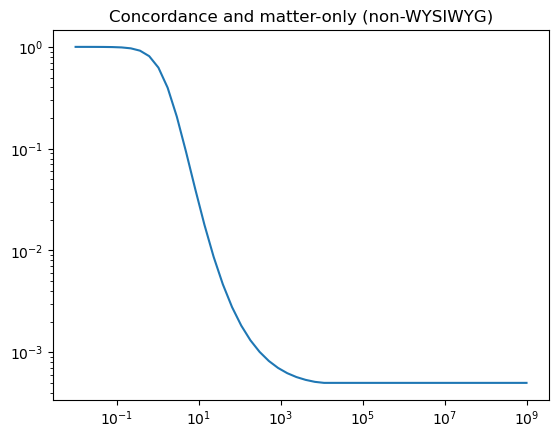

In [9]:
#CONCORDANCE COSMOLOGY (non-WYSIWYG)

#Function for the expansion rate
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_lambda + omega_r * (1 + z)**4) #all 3 components

#Calculate time dilation integral
def time_dilation_integral(z):
    #Comoving distance integrand
    def integrand(z_prime):
        D_C, _ = quad(lambda x: 1 / E(x), 0, z_prime)
        
        return -3/2 * D_C / E(z_prime)
    
    #Compute integral from 0 to z
    result = quad(integrand, 0, z)[0]
    return result

#Evaluate and plot the time dilation for a range of redshifts
zs = np.logspace(-2, 9)

time_dilation_values = []
Outer = 10**4

#Outer shell for high-redshift approx.
for z in zs:
    if z <= Outer:
        time_dilation_values.append(time_dilation_integral(z))
    else:
        outer_shell = -3/2 * (1/10**4 - 1/z + 1/(2*z**2) - 1/(2*(10**4)**2))
        time_dilation_values.append(time_dilation_integral(10**4) + outer_shell)
        
time_dilation_values = np.array(time_dilation_values)

plt.plot(zs, np.exp(time_dilation_values))
plt.xscale('log')
plt.yscale('log')
plt.title('Concordance and matter-only (non-WYSIWYG)')
plt.show()

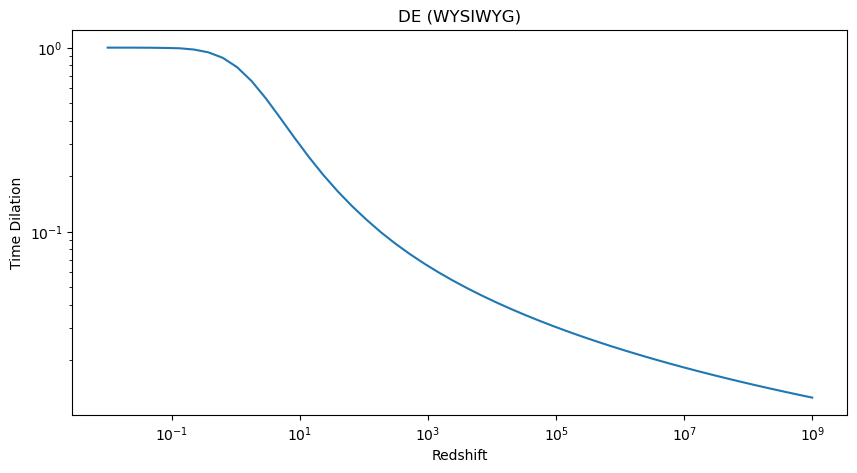

In [10]:
#DE (WYSIWYG)

#Calculate time dilation integral
def time_dilation_integral(z):
    def integrand(z):
        return -3/2 * z**2 / ((1+z)**3 * np.log(1+z))
    result, _ = quad(integrand, inner, z)
    return result

#Evaluate and plot the time dilation for a range of redshifts
zs = np.logspace(-2, 9)

De = []
inner = 0.1
outer = 100

#Inner and outer shells for low and high-redshift approx., respectively
for z in zs:
    if z <= inner:
        inner_bubble = -3/4 * (z/(1+z))**2
        De.append(inner_bubble)
    elif z > inner and z<= outer:
        De.append(inner_bubble + time_dilation_integral(z))
    else:
        outer_shell = -3/2 * (np.log(np.log(z)) - np.log(np.log(outer)))
        De.append(inner_bubble + time_dilation_integral(outer) + outer_shell)
De = np.array(De)

plt.figure(figsize=(10, 5))
plt.plot(zs, np.exp(De))
plt.xlabel('Redshift')
plt.ylabel('Time Dilation')
plt.xscale('log')
plt.yscale('log')
plt.title('DE (WYSIWYG)')
plt.savefig('DE_wys.pdf')
plt.show()

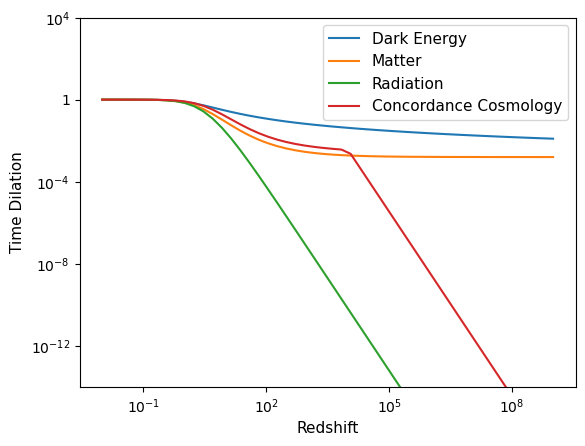

In [11]:
#WYSIWYG (all 4 models (DE, matter, radiation, and concordance))

z = np.logspace(-2,9)

Mat = -9 * (2*np.sqrt(3)*np.arctan((2*np.sqrt(1+z)+1) / np.sqrt(3)) + np.log(2+z+np.sqrt(1+z)) - np.log(1+z) - np.log(3) - 2*np.pi/np.sqrt(3))
Rad = -3 * (2*np.log(2+z) - np.log(1+z) - 2*np.log(2))

plt.plot(z, np.exp(De), label='Dark Energy')
plt.plot(z, np.exp(Mat), label='Matter')
plt.plot(z, np.exp(Rad), label='Radiation')
plt.plot(z, np.exp(time_dilation_values_wys), label='Concordance Cosmology')

plt.xlabel('Redshift', fontsize=11)
plt.ylabel('Time Dilation', fontsize=11)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-14,100)

yticks = [10**4, 1, 10**-4, 10**-8, 10**-12]
ylabels = ['$10^4$', '1', '$10^{-4}$', '$10^{-8}$', '$10^{-12}$']
xticks = [10**-1, 10**2, 10**5, 10**8]
xlabels = ['$10^{-1}$', '$10^2$', '$10^5$', '$10^8$']
plt.yticks(yticks, ylabels)
plt.xticks(xticks, xlabels)

plt.legend(fontsize=11)
plt.savefig('wysiwyg.jpg')
plt.show()

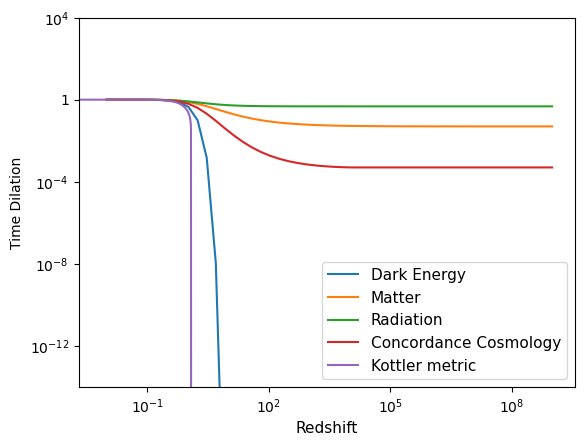

In [15]:
#non-WYSIWYG (all 4 models (DE, matter, radiation, and concordance))

z = np.logspace(-2,9)

de = -3/4 * z**2
mat = -3*(1 - 2/(np.sqrt(1+z)) + 1/(1+z))
rad = -3/2 * (1/2 - 1/(1+z) + 1/(2*(1+z)**2))

plt.plot(z, np.exp(de), label='Dark Energy')
plt.plot(z, np.exp(mat), label='Matter')
plt.plot(z, np.exp(rad), label='Radiation')
plt.plot(z, np.exp(time_dilation_values), label='Concordance Cosmology')
plt.plot(redshift, Final, label='Kottler metric')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-14,100)
plt.xlabel('Redshift', fontsize=11)
plt.ylabel('Time Dilation')

yticks = [10**4, 1, 10**-4, 10**-8, 10**-12]
ylabels = ['$10^4$', '1', '$10^{-4}$', '$10^{-8}$', '$10^{-12}$']
xticks = [10**-1, 10**2, 10**5, 10**8]
xlabels = ['$10^{-1}$', '$10^2$', '$10^5$', '$10^8$']
plt.yticks(yticks, ylabels)
plt.xticks(xticks, xlabels)

plt.legend(fontsize=11)
plt.savefig('nonwysiwyg.jpg')
plt.show()

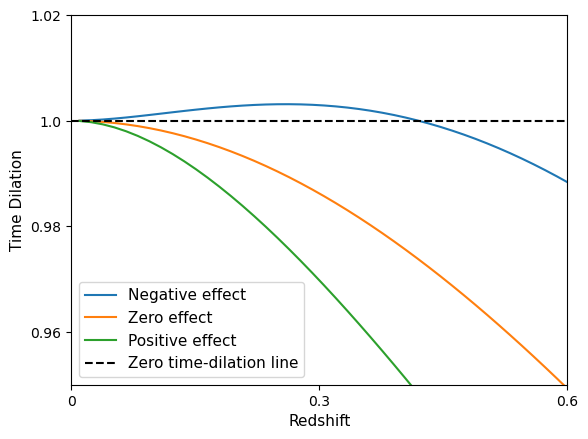

In [6]:
#THREE POSSIBILITIES OF DE TIME DILATION (1,0,-1)
#Function E(z) for the expansion rate
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_lambda + omega_r * (1 + z)**4) #all 3 components

def time_dilation_integral_wys_test(z, de_effect):
    def integrand_wys_test(z_prime):
        D_C, _ = quad(lambda x: 1 / E(x), 0, z_prime)
        D_LT, _ = quad(lambda x: 1 / ((1+x) * E(x)), 0, z)
        
        if de_effect == -1:
            return -3/2 * (omega_m + omega_r * (1 + z_prime) - (omega_lambda / (1 + z_prime)**3)) * D_C**2 / (E(z_prime) * D_LT)
        elif de_effect == 0:
            return -3/2 * (omega_m + omega_r * (1 + z_prime)) * D_C**2 / (E(z_prime) * D_LT)
        else: #de_effect == 1
            return -3/2 * (omega_m + omega_r * (1 + z_prime) + (omega_lambda / (1 + z_prime)**3)) * D_C**2 / (E(z_prime) * D_LT)
    
    result = quad(integrand_wys_test, 0, z)[0]
    return result

#Evaluate and plot the time dilation for a range of redshifts
zs = np.linspace(0.01, 0.7)
de_opposite, de_zero, de_same = [], [], []

for z in zs:
    de_opposite.append(time_dilation_integral_wys_test(z,-1))
    de_zero.append(time_dilation_integral_wys_test(z,0))
    de_same.append(time_dilation_integral_wys_test(z,1))

plt.plot(zs, np.exp(de_opposite), label='Negative effect')
plt.plot(zs, np.exp(de_zero), label='Zero effect')
plt.plot(zs, np.exp(de_same), label='Positive effect')
plt.axhline(y=1, color='black', linestyle='--', label='Zero time-dilation line')

plt.xlabel('Redshift', fontsize=11)
plt.ylabel('Time Dilation', fontsize=11)
plt.ylim(0.95,1.02)
yticks = [0.96, 0.98, 1.0, 1.02]
ylabels = ['0.96', '0.98', '1.0', '1.02']
plt.xlim(0.0,0.6)
xticks = [0,0.3,0.6]
xlabels = ['0', '0.3', '0.6']
plt.yticks(yticks, ylabels)
plt.xticks(xticks, xlabels)

plt.legend(fontsize=11)
plt.savefig('DE_effect_wys.jpg')
plt.show()

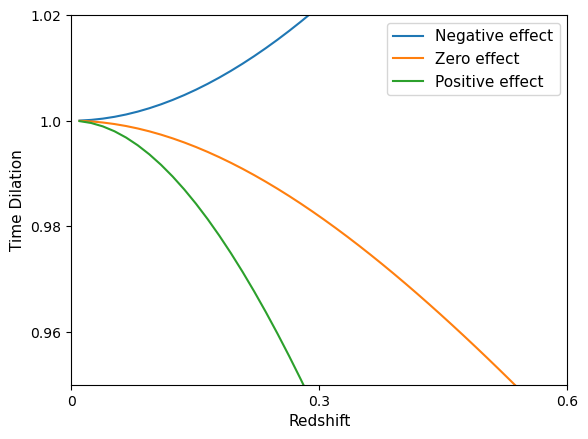

In [7]:
#THREE POSSIBILITIES OF DE TIME DILATION (1,0,-1) (non-WYSIWYG)
#Function E(z) for the expansion rate
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_lambda + omega_r * (1 + z)**4) #all 3 components

def time_dilation_integral_test(z, de_effect):
    def integrand_test(z_prime):
        D_C, _ = quad(lambda x: 1 / E(x), 0, z_prime)
        if de_effect == -1:
            return -3/2 * (-omega_lambda + omega_m + omega_r) * D_C / E(z_prime)
        elif de_effect == 0:
            return -3/2 * (omega_m + omega_r) * D_C / E(z_prime)
        else: #de_effect == 1
            return -3/2 * (omega_lambda + omega_m + omega_r) * D_C / E(z_prime)
        
    result = quad(integrand_test, 0, z)[0]
    return result

#Evaluate and plot the time dilation for a range of redshifts
zs = np.linspace(0.01, 0.7)
De_opposite, De_zero, De_same = [],[],[]

for z in zs:
    De_opposite.append(time_dilation_integral_test(z,-1))
    De_zero.append(time_dilation_integral_test(z,0))
    De_same.append(time_dilation_integral_test(z,1))

plt.plot(zs, np.exp(De_opposite), label='Negative effect')
plt.plot(zs, np.exp(De_zero), label='Zero effect')
plt.plot(zs, np.exp(De_same), label='Positive effect')

plt.xlabel('Redshift', fontsize=11)
plt.ylabel('Time Dilation', fontsize=11)
plt.ylim(0.95,1.02)
yticks = [0.96, 0.98, 1.0, 1.02]
ylabels = ['0.96', '0.98', '1.0', '1.02']
plt.xlim(0.0,0.6)
xticks = [0,0.3,0.6]
xlabels = ['0', '0.3', '0.6']
plt.yticks(yticks, ylabels)
plt.xticks(xticks, xlabels)

plt.legend(fontsize=11)
plt.savefig('De_effects_nonwys.jpg')
plt.show()